In [64]:
import pandas as pd
data = pd.read_csv('/Users/yena/Desktop/SCH/척척석사/연구 진행 및 분석 코드/약물전체추가/1.5/FINAL_약물전체추가(1:1.5).csv')
data = data.drop(columns=['등록번호'])
data.head()

,MFS,total_cci,키,몸무게,성별,나이,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,호흡 간호_비침습적 산소 투여,통증강도,욕창_행동,욕창_영양,낙상유무,Cluster_A,Cluster_B,Cluster_C,Cluster_D,Cluster_E,Cluster_F,Cluster_G,Cluster_H,Cluster_I,Cluster_J,Cluster_K,Cluster_L,Cluster_M,Cluster_N,Cluster_O,Cluster_P,Cluster_Q,Cluster_R,Cluster_S,Cluster_T,Cluster_U,ADL_전문,ADL_위험,욕창_기동력
0,50.0,0.0,185.3,110.3,0,28.0,0,0,0,0,0,8.000000,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50.0,1.8,185.3,101.8,0,35.9,0,1,1,0,0,0.000000,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,0.0,171.0,101.0,0,31.0,2,0,1,0,0,0.000000,2,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,1.0,179.0,98.4,0,44.0,0,0,0,0,0,3.857143,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.0,0.0,169.1,97.0,0,44.9,0,1,1,0,0,5.000000,3,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
import os
import pandas as pd
import numpy as np
import sys
import openpyxl

from datetime import datetime
import datetime
from datetime import timedelta

from tqdm import tqdm

import matplotlib

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
# plt.rc('figure', figsize=(15,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

#마이너스 폰트
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
#판다스 컬럼 다보기
pd.set_option('display.max_columns', 100)

#시각화?
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
#elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    #plt.rc('font', family='Malgun Gothic')



# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [66]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_breast_cancer, load_diabetes, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [67]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, x.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max))

    return xx, yy

In [68]:
def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)

    return out

In [69]:
x = data.drop(columns=['낙상유무'])
y = data['낙상유무']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)


In [70]:
# pipe = Pipeline([('model', SVC(kernel='linear',probability=True, random_state=10))])

# param_grid = [{'model__gamma' : ['scale', 'auto'],
#                'model__C':[10, 5.0 ,2.0, 1.0, 0.1, 0.01, 0.5],
#             }]

# import multiprocessing


# gs = GridSearchCV(
#    estimator = pipe,
#    param_grid = param_grid,
#    n_jobs = multiprocessing.cpu_count(),
#    cv=5,
#    verbose=True
# )

# gs.fit(x, y)

In [71]:
# gs.best_estimator_

In [72]:
# gs.best_params_

In [73]:
model = SVC(kernel='linear', gamma='scale', C=0.1, probability=True, random_state=10)
model.fit(x_train, y_train)


print('==========Linear SVC (best_estimator_)=============')
print('학습 데이터 점수 : ', model.score(x_train, y_train))
print('테스트 데이터 점수 : ', model.score(x_test, y_test))

==========Linear SVC (best_estimator_)=============
학습 데이터 점수 :  0.9366602687140115
테스트 데이터 점수 :  0.9330357142857143


In [74]:
y_test_pred = model.predict(x_test)


from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_test_pred)
print('Linear SVC 정답률 : %.4f' % accuracy)

Linear SVC 정답률 : 0.9330


In [75]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print('tn, fp, fn, tp = ', tn, fp, fn, tp)


recall = tp/(tp + fn) # 민감도 또는 재현율
specificity = tn/(tn + fp) # 특이도
precision = tp/(tp+fp) # 정밀도, 양성예측도
minus = tn/(fn+tn)  # 음성예측도

print('양성예측도 = ', precision)
print('음성예측도 = ' ,minus)
print('민감도 = ', recall)
print('특이도 = ' ,specificity)

tn, fp, fn, tp =  88 8 7 121
양성예측도 =  0.937984496124031
음성예측도 =  0.9263157894736842
민감도 =  0.9453125
특이도 =  0.9166666666666666


In [76]:
from sklearn.metrics import f1_score, roc_auc_score


print('f1 : {}'.format(f1_score(y_test, y_test_pred)))


f1 : 0.9416342412451363


In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score

print('roc_auc_score : ', roc_auc_score(y_test, y_test_pred))


roc_auc_score :  0.9309895833333334


In [78]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10)
display_score(cross_val)

Score :  [0.9245283  0.90384615 0.92307692 0.92307692 0.90384615 0.88461538
 0.90384615 0.96153846 0.98076923 0.86538462]
Mean :  0.9174528301886792
StandardDeviation :  0.03226554565368406


In [79]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='f1', cv=10)
display_score(cross_val)

Score :  [0.9375     0.92063492 0.9375     0.93548387 0.92307692 0.90909091
 0.92307692 0.96969697 0.98412698 0.89552239]
Mean :  0.9335709888731072
StandardDeviation :  0.025159673182908335


In [80]:
from sklearn.model_selection import cross_val_score

def display_score(score):
    print('Score : ', score)
    print('Mean : ', score.mean())
    print('StandardDeviation : ' ,score.std())
    
    
cross_val = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=10)
display_score(cross_val)

Score :  [0.98958333 0.9093702  0.940625   0.9734375  0.9609375  0.9609375
 0.9546875  1.         0.9984375  0.9765625 ]
Mean :  0.9664578533026112
StandardDeviation :  0.026380308773741767


In [89]:
x_comp = TSNE(n_components=2).fit_transform(x)  # SVM이 고차원에서 진행. 2차원(저차원)으로 시각화 하기 위한 과정
x0, x1 = x_comp[:,0], x_comp[:,1]
xx, yy = make_meshgrid(x0, x1)

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


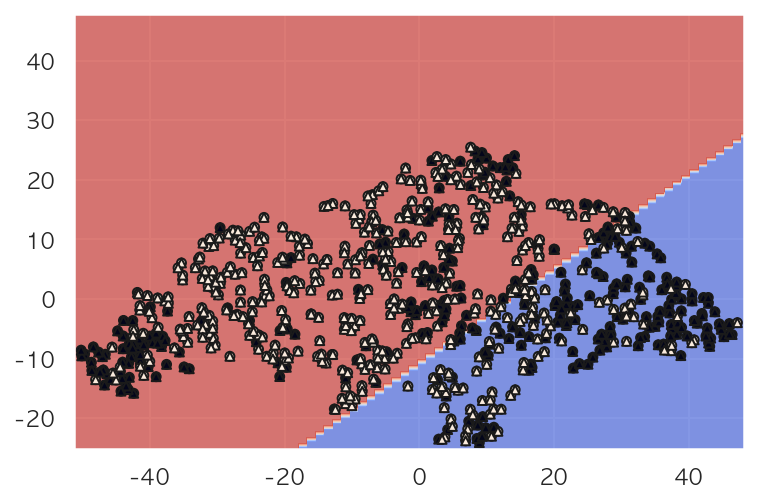

In [90]:
model.fit(x_comp, y)

plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(x0,x1, c=y, marker='o', s=20, edgecolors='k')
plt.scatter(x0, x1, c=y,  marker='^' ,s=20, edgecolors='k')